# Performance Comparison of Gradient Descents Variant on White Wine Quality Predictor

Hello everyone and Prof. Di Bo Ya, my name is Denzel Elden Wijaya, and in this notebook I will showcase you the perfromance comparisons of Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Stochastic Gradient Descent on White Wine Quality Datasets. 

The process will include these steps:
1. Get the Wine Quality Dataset
2. Data Preprocessing on Regression
3. Gradient Descent Variants Implementation
4. Analysis and Report

### 1. Get The Wine Quality Dataset

First, we will import the dataset from [UCI Repository Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality). Inside the dataset, there are two different of wines, red wine and white wine, but in this implementation, I will just use the white wine dataset.

In [18]:
import pandas as pd

dataset_path = "datasets/winequality-white.csv"

data = pd.read_csv(dataset_path, sep=';')

In [19]:
# Data Inspection and Checking

print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [20]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This means the dataset is ready to be preprocessed, since all of the data exists and there is no null value inside the dataset, and all of the other snaity check for the data also has been processed well.

### 2. Data Preprocessing on Regression

To explain, the quality is an integer ranging from 0 to 10, and we will use linear regression alter to predict this value number. But, before that let's split the datasets.

1. **Split into Features and Targets**

In [21]:
import numpy as np

X = data.drop('quality', axis=1)
y = data['quality'].values

2. **Split `X` and `y` into Train and Validation**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_val = train_test_split(y, test_size=0.2, random_state=42)

3. **Feature Scaling (Helps speeding the Converging of Gradient-based method)**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### 3. Gradient Descents Variation Implementation

Let's define some helpers function for the gradient descent process. As we know, we need the dot product in each process to compute the gradient/first derivative of the function, then we will use MSE (Mean Square Error) as our loss function.

In [24]:
def predict(X, w, b):
    """
    Returns predictions of a linear model y = Xw + b
    """
    return np.dot(X, w) + b

def mse_loss(X, y, w, b):
    """
    Returns Mean Squared Error
    """
    predictions = predict(X, w, b)
    return np.mean((predictions - y)**2)

def compute_gradients(X_batch, y_batch, w, b):
    """
    Computes the gradients of the MSE loss w.r.t. w and b
    """
    n = len(y_batch)
    predictions = predict(X_batch, w, b)
    errors = predictions - y_batch

    grad_w = (1/n) * np.dot(X_batch.T, errors)
    grad_b = (1/n) * np.sum(errors)
    return grad_w, grad_b

1. **Gradient Descent**

People usually called it ass Batch Gradient Descent as it will use all traning samples to compute gradients each update

In [25]:
import time

def gradient_descent(X, y, X_val, y_val, learning_rate = 0.01, num_epochs = 100):
    n_features = X.shape[1]
    
    w = np.random.randn(n_features)
    b = 0.0
    
    history = []
    start_time = time.time()
    
    for epoch in range(num_epochs):
        grad_w, grad_b = compute_gradients(X, y, w, b)
        
        # update parameters (the gradient descent process)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        train_loss = mse_loss(X, y, w, b)
        val_loss = mse_loss(X_val, y_val, w, b)
        history.append((train_loss, val_loss))
        
        if(epoch+1)%10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}: train_loss = {train_loss}, val_loss = {val_loss}')
    
    print('time elapsed: ', time.time() - start_time)
    return w, b, history

2. **Stochastic Graddient Descent (SGD)**
SGD updates parameters for each individual sample, we usually take a randomly selected training data point and then finally we just need to compute the gradient of the loss function afterwards.

In [29]:
import time

def stochastic_gradient_descent(X, y, X_val, y_val, learning_rate=0.01, num_epochs=100):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features)
    b = 0.0
    
    history = []
    
    start_time = time.time()
    
    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        indices = np.random.permutation(n_samples)
        
        for i in indices:
            X_i = X[i].reshape(1, -1)
            y_i = np.array([y[i]])  # Wrap y[i] in a list to create an array of length 1
            
            grad_w, grad_b = compute_gradients(X_i, y_i, w, b)
            
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b
            
        train_loss = mse_loss(X, y, w, b)
        val_loss = mse_loss(X_val, y_val, w, b)
        history.append((train_loss, val_loss))
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}: train_loss = {train_loss}, val_loss = {val_loss}')
    
    print('Time elapsed:', time.time() - start_time)
    return w, b, history


3. **Mini-batch Stochastic Gradient Descent**

it is basically SGD, but now rather than only one dataset, we will use a batch here, where I will use the size of 32.

In [44]:
import time
import numpy as np

def mini_batch_stochastic_gradient_descent(X, y, X_val, y_val,
                                           learning_rate=0.01,
                                           num_epochs=100,
                                           batch_size=16):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features)
    b = 0.0
    
    history = []
    
    start_time = time.time()
    
    y = np.array(y)
    
    for epoch in range(num_epochs):
        # Shuffle data each epoch using np.random.permutation
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            
            # Compute gradients and update weights
            grad_w, grad_b = compute_gradients(X_batch, y_batch, w, b)
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b
        
        train_loss = mse_loss(X, y, w, b)
        val_loss = mse_loss(X_val, y_val, w, b)
        history.append((train_loss, val_loss))
        
        if (epoch+1) % 10 == 0:
            print(f"[Mini-batch SGD] Epoch {epoch+1}/{num_epochs}, "
                  f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    print('Time elapsed:', time.time() - start_time)
    return w, b, history

In [53]:
num_epochs = 200
lr = 0.01

print("------------------Gradient Descent------------------")
w_bgd, b_bgd, history_bgd = gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs
)

print("------------------Stochastic Gradient Descent------------------")
w_sgd, b_sgd, history_sgd = stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs
)

print("------------------Mini Batch Stochastic Gradient Descent------------------")
w_mbgd, b_mbgd, history_mbgd = mini_batch_stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs
)
w_mbgd_2, b_mbgd_2, history_mbgd_2 = mini_batch_stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs,
    batch_size=32
)

------------------Gradient Descent------------------
Epoch 10/200: train_loss = 32.58786617830472, val_loss = 34.44084849562223
Epoch 20/200: train_loss = 26.794368111498507, val_loss = 28.33275873419969
Epoch 30/200: train_loss = 22.068910747064702, val_loss = 23.344306523782816
Epoch 40/200: train_loss = 18.208459470726556, val_loss = 19.264320295845014
Epoch 50/200: train_loss = 15.051274316142582, val_loss = 15.924069154912138
Epoch 60/200: train_loss = 12.46729559883909, val_loss = 13.187544382578686
Epoch 70/200: train_loss = 10.351286829595807, val_loss = 10.944480716569872
Epoch 80/200: train_loss = 8.617749713831099, val_loss = 9.105149127575524
Epoch 90/200: train_loss = 7.197037411353051, val_loss = 7.596355653407587
Epoch 100/200: train_loss = 6.032317245196441, val_loss = 6.358301139829055
Epoch 110/200: train_loss = 5.077160208249839, val_loss = 5.342080323826652
Epoch 120/200: train_loss = 4.293607735204095, val_loss = 4.507670459805856
Epoch 130/200: train_loss = 3.6506

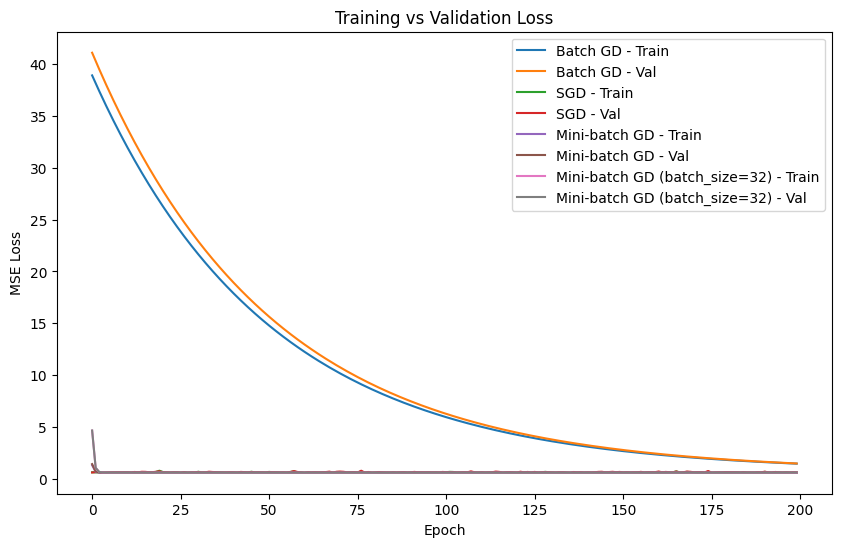

In [54]:
import matplotlib.pyplot as plt

def plot_loss(history, label):
    plt.plot([h[0] for h in history], label=f'{label} - Train')
    plt.plot([h[1] for h in history], label=f'{label} - Val')

plt.figure(figsize=(10,6))
plot_loss(history_bgd, "Batch GD")
plot_loss(history_sgd, "SGD")
plot_loss(history_mbgd, "Mini-batch GD")
plot_loss(history_mbgd_2, "Mini-batch GD (batch_size=32)")
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [55]:
num_epochs = 200
lr = 0.1

print("------------------Gradient Descent------------------")
w_bgd, b_bgd, history_bgd = gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs
)

print("------------------Stochastic Gradient Descent------------------")
w_sgd, b_sgd, history_sgd = stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs
)

print("------------------Mini Batch Stochastic Gradient Descent------------------")
w_mbgd, b_mbgd, history_mbgd = mini_batch_stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs
)

w_mbgd_2, b_mbgd_2, history_mbgd_2 = mini_batch_stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, 
    learning_rate=lr, 
    num_epochs=num_epochs,
    batch_size=32
)

------------------Gradient Descent------------------
Epoch 10/200: train_loss = 5.433333731303789, val_loss = 4.9782403170857155
Epoch 20/200: train_loss = 1.2736222432275943, val_loss = 1.1447063631009848
Epoch 30/200: train_loss = 0.7170317042096948, val_loss = 0.6488898301274021
Epoch 40/200: train_loss = 0.6276465894288309, val_loss = 0.5762049194966443
Epoch 50/200: train_loss = 0.6069796360543254, val_loss = 0.563226284006883
Epoch 60/200: train_loss = 0.5996052495154031, val_loss = 0.5607510445267103
Epoch 70/200: train_loss = 0.5959554961748337, val_loss = 0.560622342499079
Epoch 80/200: train_loss = 0.5936841750229487, val_loss = 0.5610050353065466
Epoch 90/200: train_loss = 0.5920035986509615, val_loss = 0.5613938715934604
Epoch 100/200: train_loss = 0.5906025836548197, val_loss = 0.5616624917577618
Epoch 110/200: train_loss = 0.5893500265527338, val_loss = 0.5618048013928462
Epoch 120/200: train_loss = 0.5881889383177894, val_loss = 0.561848127325902
Epoch 130/200: train_los

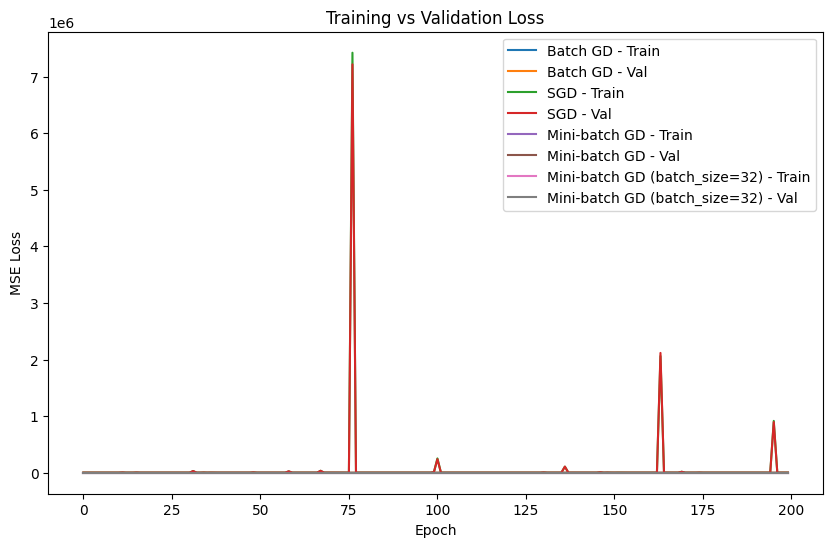

In [56]:
import matplotlib.pyplot as plt

def plot_loss(history, label):
    plt.plot([h[0] for h in history], label=f'{label} - Train')
    plt.plot([h[1] for h in history], label=f'{label} - Val')

plt.figure(figsize=(10,6))
plot_loss(history_bgd, "Batch GD")
plot_loss(history_sgd, "SGD")
plot_loss(history_mbgd, "Mini-batch GD")
plot_loss(history_mbgd_2, "Mini-batch GD (batch_size=32)")
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

### 4. Analysis and Report

**Summary Table**

| **Method**                   | **Learning Rate** | **Batch Size** | **Train Loss** | **Validation Loss** | **Comments**                                                                                                |
|------------------------------|-------------------|----------------|----------------|---------------------|-------------------------------------------------------------------------------------------------------------|
| **Batch GD**                 | 0.01              | Full Batch     | 1.43           | 1.45                | Fastest to execute but higher losses at lr=0.01.                                                            |
| **Stochastic GD (SGD)**      | 0.01              | Single Sample  | 0.58           | 0.59               | Lower loss than GD at lr=0.01, though execution is slower due to per-sample updates.                         |
| **Mini-batch SGD**           | 0.01              | 32             | 0.56           | 0.57               | Best performance at lr=0.01; balances speed and accuracy well.
| **Mini-batch SGD**           | 0.01              | 20             | 0.56           | 0.57               | Another best performance at lr=0.01; balances speed and accuracy well.                                                |
| **Batch GD**                 | 0.1               | Full Batch     | 0.58           | 0.56                | Improved performance at a higher learning rate.                                                             |
| **Stochastic GD (SGD)**      | 0.1               | Single Sample  | 4.57           | 4.39                | Highly unstable with lr=0.1; losses fluctuate wildly and diverge.                                            |
| **Mini-batch SGD**           | 0.1               | 32             | 0.60           | 0.58                | Remains stable and yields excellent performance at lr=0.1.                                                   |
| **Mini-batch SGD**           | 0.1               | 20             | 0.56           | 0.57              | Slightly lower loss than with batch size 32; smaller batches increase training time without much gain.        |


**Additional Analysis and Insights**

1. Batch Size Effects:

    When you reduce the mini-batch size (for example, from 32 to 20), you will typically see an increase in training time since more batches are processed per epoch. However, in my experiments, the train and validation losses remain quite similar. This suggests that the smaller mini-batch size does not significantly degrade performance but does come at the cost of longer training.

2. Learning Rate Sensitivity:
- At learning_rate = 0.01, both SGD and mini-batch SGD perform very well, with mini-batch SGD giving the lowest losses
- At learning_rate = 0.1, batch GD and mini-batch SGD continue to perform well, while SGD becomes very unstable (with loss value spiking up to around 17280). This instability in SGD is due to the high variance of single-sample updates when the learning rate is too high.

3. Number of Epochs: 

    Reducing number of epochs mean less time for the model to converge:
- Underfitting: With too few epochs, the model might not learn the underlying enoughly, resulting in higher loss.
- Diminishing returns: On the other hand, if the learning rate is high and the model converges quickly, additional epochs may not provide significant further improvements.

    Thus, a balance is needed, like you see yourself, in a correct learning_rate, in every 10 epochs, the result is always getting better until some point it will become stagnant, so from here I can know where I can stop is when there is no other significant changes.

4. Convergence Rate:

- Batch GD: Although each epoch is computed quickly, using the full dataset for updates makes convergence slow (i.e., higher losses remain even after many epochs), especially at lower learning rates.

- Stochastic GD (SGD): Offers rapid initial loss reduction because each update is based on one sample; however, the updates are very noisy. This noise causes high fluctuation in the loss values, particularly evident with higher learning rates (lr = 0.1), where the loss can oscillate wildly.

- Mini-batch SGD: Strikes the best balance. With an optimal batch size (e.g., 32), the convergence is both fast and stable. Smaller batch sizes (like 20) slightly slow convergence due to more updates being processed per epoch, but the difference in loss is marginal.

### Conclusion

- Execution Speed vs. Accuracy:

    Batch GD is fastest in terms of execution but yields higher losses when using a lower learning rate. Mini-batch SGD appears to offer the best balance between execution time and convergence quality, particularly at a well-tuned learning rate (e.g., 0.01 or 0.1 with appropriate batch sizes).

- Hyperparameter Tuning:

    The learning rate must be carefully tuned for each method. Too high a learning rate, especially in SGD, can lead to erratic behavior and divergence. Additionally, the batch size in mini-batch SGD has a trade-off: smaller batches may slightly worsen the loss and increase training time, while larger batches may speed up training but might not always yield the best convergence.

- Epochs:

    Lowering the number of epochs degrades performance due to under-training. However, with a high learning rate, models may converge quickly—so there’s a point of diminishing returns where extra epochs do not bring significant improvement.

That will be the end of the notebook and report. I hope it will give you more insights.